In [70]:
%pdb off
%matplotlib inline

from VLM.bzFRInGE import *
from VLM.bzFRInGE.experiments import *
from VLM.bzFRInGE.FRINGEBase import ExpBase
from VLM.bzFRInGE.profiles import profile_meta

# from BZ import bbPlot, bbGIS
# from mintpy.utils import readfile, writefile, utils as ut
# from mintpy.cli import view, tsview

import contextily as cx
import geopandas as gpd

# import h5py
# import xarray as xr
# # import hvplot.xarray 
import cartopy.crs as ccrs
# from cartopy.io import img_tiles as cimgt

exp     = DC_SR
ne      = 20 
Exp0    = ExpBase(exp, 'ERA5_SET_PM_ex_Fast', 'USN8', neofs=ne)
ExpBest = Exp0

df_gps  = prep_gps(ExpBest.path_gps, ExpBest.reg)

path_figs = PATH_RES / f'{ExpBest.reg}_2024'
path_transects = Path(ExpBest.path_wd) / 'Transects'

print ('Data is at: {os.getenv("dataroot")}\n')
print (os.getenv('CONDA_PROMPT_MODIFIER'), datetime.now())

Automatic pdb calling has been turned OFF
Got 221 wrapped ifgs (SR)
Data is at: {os.getenv("dataroot")}

(MintPy)  2024-07-22 02:48:55.558594


# Setup
- first draw profiles in google earth and save the kml to disk
- export them to, e.g., : /Users/buzzanga/data/VLM/Sentinel1/DC/Transects/Transect_Brooklyn1.kmz

## Setup the profile meta data
- go into the script and add the dictionaries

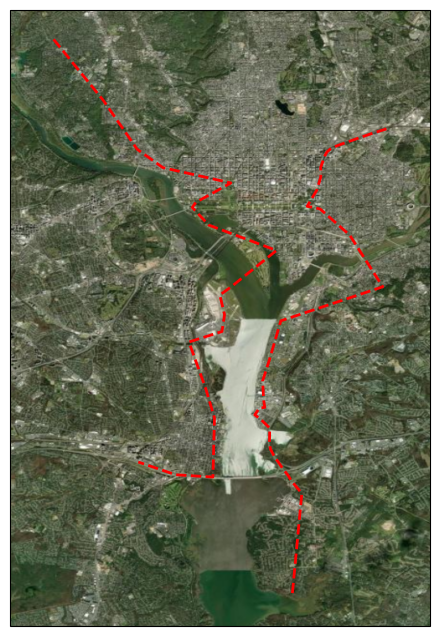

In [81]:
# these are made from the kmzs with profile_meta.py; may need dto be copied from local
gdf_m = pd.concat(gpd.read_file(path_transect) for path_transect in path_transects.glob('*.GeoJSON'))

fig, axes = plt.subplots(figsize=(8,8), subplot_kw={'projection': ccrs.PlateCarree()})
# axes.set_extent(ExpBest.WESN)
axes.set_extent([-77.115, -76.965, 38.74, 38.96]) 
gdf_m.plot(edgecolor='red', linewidth=2, linestyle='--', facecolor='none', ax=axes)
axes.grid(True, alpha=0.1, color='k')
cx.add_basemap(ax=axes, crs=gdf_m.crs, source=cx.providers.Esri.WorldImagery, attribution=False)

In [73]:
gdf_m.total_bounds

array([-77.09942723,  38.75090048, -76.98055563,  38.94951628])

In [57]:
# t_names = sorted([x.stem for x in path_transects.glob('*.GeoJSON')])
# inps = argparse.Namespace(transects=t_names, dct_exp_n=f'{ExpBest.reg}_SR', mp_exp=ExpBest.mp_exp0, ref_sta=ExpBest.ref_sta, neofs=ExpBest.neofs)
# profile_meta.main(inps)


Got 221 wrapped ifgs (SR)
Wrote DC parameters to: /u/leffe-data2/buzzanga/data/VLM/Sentinel1/DC/Transects/profile_parms.mat
